# be humble view bumble

A recent review shows how big the variation of visual perception across the phylum of insects is (van der Kooi). Nonetheless, many of which have a set of 3 different wavelength receptors, covering a range of wavelengths from ~300 to ~700 nm (or in words, from UV to red). As there is no direct physical way of measuring this perception, a framework combining physiological exminations, wavelength measurements and mathematical transformations was set up during the 20th century (Wyszecki, spines 1982 and Chittka, Waser 1997). Thus, it is possible to compare different flowers by how they are perceived by an insect. This notebook implements the concept described by Chittka, L. & Kevan, P.G. (2005) and enables the comparison of multiple species of flowers on how they are sensed by a trichromatic insect eye.

## Import the backbone

At first the correspondent module needs to be loaded:

In [1]:
from convwale import *

In [13]:
# import importlib
# importlib.reload(convwale)

<module 'convwale' from '/Users/Thomsn/Desktop/island_in_the_sun/python/2021_03_bumbleview/bumbleview/convwale.py'>

The notebook depends on physical wavelength data measured from leaf samples (or anything else ;-) ). There are some prerequisites that should be fulfilled, for a proper analysis:
- Measurements of at least every 5 nm from 300 to 700 nm (it is no problem if more and over a larger range; the data will be cut subset later). 
- Each measure needs to be mapped to its wavelength, otherwise it is not possible to transfer it to insect vision.

Therefore a `csv`-file (can be seperaten by "`,`", "`;`" or tabs "`\t`") should be constructed with the following structure: 
- No header row
- First column stores the wavelengths of the measurements (the decimal seperator is the dot "`.`")
- Column "`2`" to "`n+1`" store the measurements of wavelength reflections for all "`n`" samples

Here is an example (`<...>` reflects additional rows/columns); remark that the first column represents the wavelength in nm:

`300.0,0.383,6.963,0.421,<...>,0.281`  
`300.37,0.376,7.038,0.458,<...>,0.344`  
`300.74,0.412,7.053,0.455,<...>,0.363`  
`301.1,0.369,7.005,0.466,<...>,0.371`  
`<...>,<...>,<...>,<...>,<...>,<...>`  
`699.82,23.876,18.449,18.429,<...>,15.538`  
`700.15,24.095,18.341,18.518,<...>,15.67`

Now you can upload your wavelength emission data. Just run the next codeblock and select the file you want to upload (emission values do not need to be standardized to the interval `[0,1]`).

In [2]:
wl_uploader = input_flowers()

FileUpload(value={}, accept='.csv', description='Upload')

For a complete analysis meta data of the samples is required. Therefore, this script uses another `csv`-file that specifies genus, species, leaf area and additional information (e.g. unique ID) of each sample. In principal, these "fields" can determine any kind of categorical assignment, but are thought to be used as defined by there name. So, to standardize the input, the `csv`-file for meta information should have the following structure:
- 4 columns, whereas the encoding is in the following order: genus, species epithet, leaf area, additional information.
- Each `n`-th row corresponds to the same sample as the `n+1`-th column of the previously uploaded reflection data `csv`-file. 
- No header should be used

Here is again an example:

`Gentiana,acaulis,stigma,1`  
`Gentiana,acaulis,stigma,2`  
`Primula,lutea,apical,1`  
`Primula,lutea,basal,1`  
`<...>,<...>,<...>,<...>`  
`Primula,hirsuta,apical,10`  
`Primula,hirsuta,basal,10`


The next codeblock contains the uploading bar for the `csv`-file for meta data. Run the block and select the file.

In [3]:
meta_uploader = input_flowers()

FileUpload(value={}, accept='.csv', description='Upload')

After selecting both files containing wavelength reflection data and meta information, please run the next codeblock to finally import your data. If one or the other file is missing, data will not be loaded, but an example dataset on alpine flowers used.

In [4]:
wl_df = parse_flowers(wl_uploader)
meta_df = parse_flowers(meta_uploader, data=False)

flowers = new_floral_spectra(wl_df, meta_df)

You did not successfully select a file. The example file will be used.
You did not successfully select a file. The example file will be used.


As a first processing step a so called min-max normalization is performed on the wavelength spectrum of each sample. Thus, the whole data lies within the real interval `[0,1]`.

## Select genus and leaf area

A genus can be chosen to focus analysis on: \$a+a\$

In [5]:
genus_choice = flowers.select_key()

Dropdown(description='Genus:', options=(('Gentiana', 0), ('Primula', 1), ('Rhododendron', 2), ('Silene_acaulis…

A leaf area can be chosen to focus analysis on:

In [10]:
area_choice = flowers.select_key(key="area", genus_choice=genus_choice)

Dropdown(description='Area:', options=(('ventral_apical', 0), ('ventral_medial', 1), ('stigma', 2), ('ventral'…

The following codeblock saves the choices for genus and leaf area.

In [23]:
genus = get_dropdown_value(genus_choice)
area = get_dropdown_value(area_choice)

## Plot the physical spectra

### Wavelength spectra

ipykernel_launcher:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


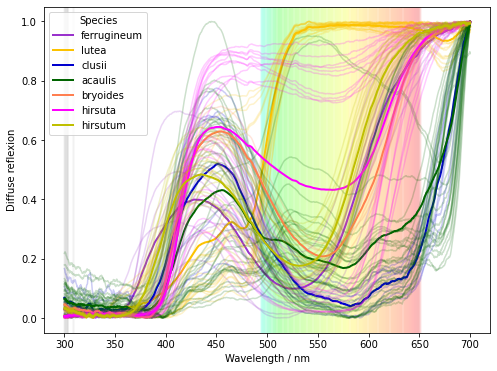

In [24]:
fig = flowers.plot_wl_spectra(genus, area, show_fig=True)
fig.show()

In [10]:
flowers.plot_all_inclusive(plot_type="wl_spectra")

/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


### PCA

ipykernel_launcher:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


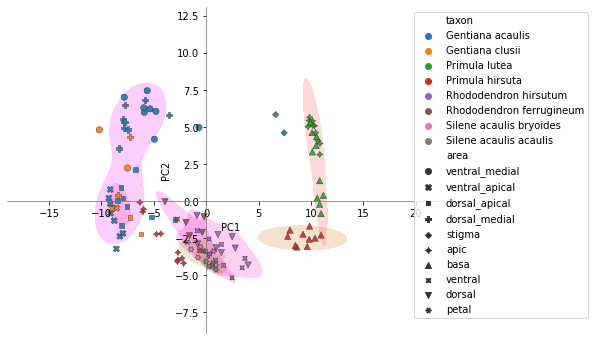

In [25]:
fig = flowers.plot_pca(genus=genus, area=area, show_fig=True)
fig.show()

In [11]:
flowers.plot_all_inclusive(plot_type="pca_physical")

/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


## Plot insect vision

### Hexagon

ipykernel_launcher:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


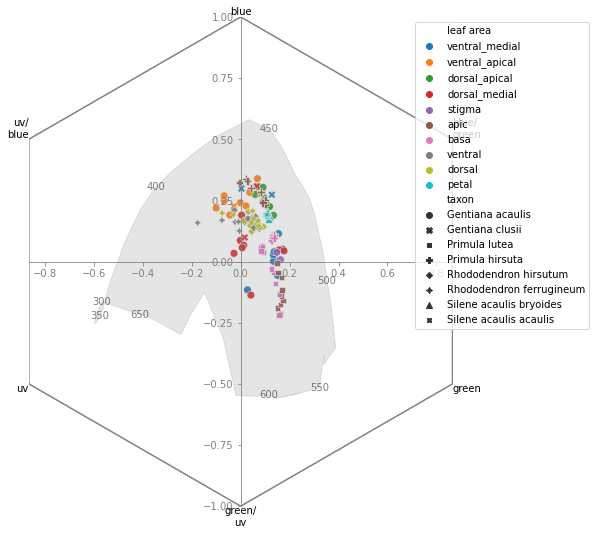

In [26]:
fig = flowers.plot_hexagon(genus=genus, area=area, show_fig=True)
fig.show()

In [8]:
flowers.plot_all_inclusive(plot_type="hexagon")

### Triangle

ipykernel_launcher:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


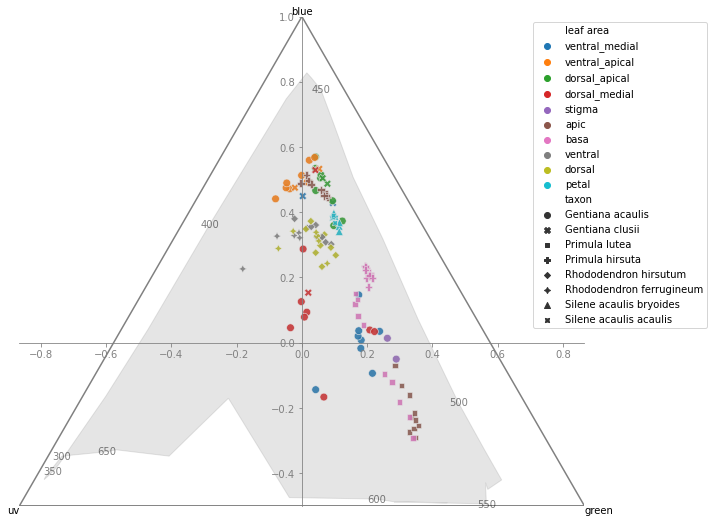

In [27]:
fig = flowers.plot_triangle(genus=genus, area=area, show_fig=True)
fig.show()

In [7]:
flowers.plot_all_inclusive(plot_type="triangle")

### PCA

ipykernel_launcher:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


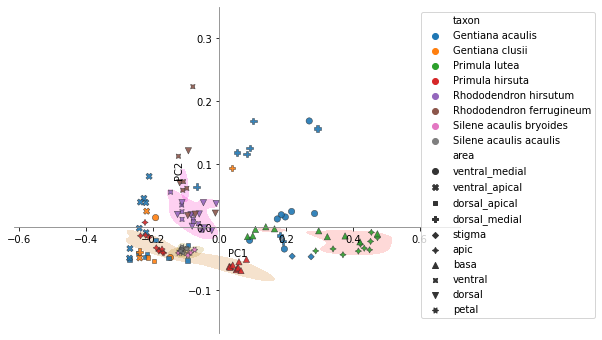

In [28]:
fig = flowers.plot_pca(genus=genus, area=area, show_fig=True, data_type="insect_vision")
fig.show()

In [17]:
flowers.plot_all_inclusive(plot_type="pca_insect_vision")

/Users/Thomsn/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


### Pairwise color distances

#### Dendrogram

ipykernel_launcher:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


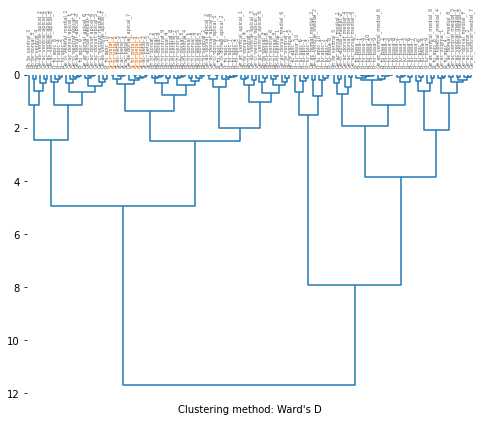

In [29]:
fig = flowers.plot_distances(genus=genus, area=area, show_fig=True, plot_type="dendrogram")
fig.show()

In [5]:
flowers.plot_all_inclusive(plot_type="dendrogram")

/Users/Thomsn/Desktop/island_in_the_sun/python/2021_03_bumbleview/bumbleview/bumbleview/plotting.py:228: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram_df = hierarchy.linkage(pairwise_color_dist, 'ward')


#### Heatmap

ipykernel_launcher:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


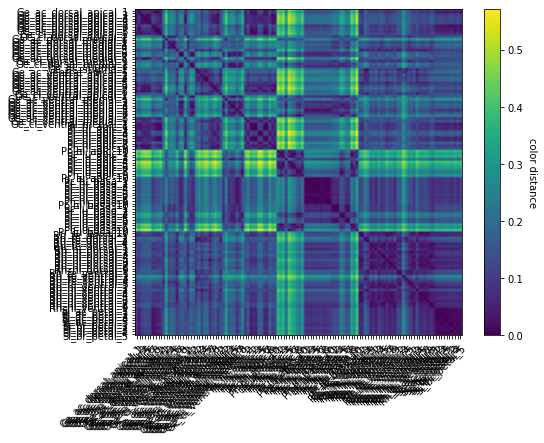

In [30]:
fig = flowers.plot_distances(genus=genus, area=area, show_fig=True, plot_type="heatmap")
fig.show()

In [6]:
flowers.plot_all_inclusive(plot_type="heatmap")

## Download all plots

In [12]:
flowers.download_data()

/Users/Thomsn/Desktop/island_in_the_sun/python/2021_03_bumbleview/bumbleview/bumbleview/bumble_view_20210314185258184049.zip

## Clean up temporary directory

In [13]:
flowers.close_temporary_dir()

# Some additional information

The Floral Reflectance Database (FReD; http://www.reflectance.co.uk/) stores reflectance data of several taxa. It is a great source for getting insights in the wide spectrum of floral spectra. As science is about cooperation and open data enables much more comparative studies, consider to submit you reflectance data there.

This notebook was constructed by the support of Thomas Rupp (Salzburg, Austria), thanks for the help with the analysis.

